# Visualizar e salvar figuras do Teste 2

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from typing import Any
from time import time
from pathlib import Path

## Configurações para salvar as figuras

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    "figure.figsize":  [10, 5], # [3.4, 2.1],
    "axes.labelsize":  12,      # 8,
    "font.size":       12,      # 8,
    "legend.fontsize": 12,      # 8,
    "xtick.labelsize": 12,      # 8,
    "ytick.labelsize": 12,      # 8,
#     "axes.titlesize":  14,
#     "axes.axisbelow":  True,
#     "text.usetex":     True,
#     "font.family":     "serif",
#     "font.serif":      ["Times"]
}
plt.rcParams.update(params)

## Definição de funções

In [3]:
def printarMaisMetricas(
    dictResultado: dict[str, Any]
) -> None :
    
    print("acuraciaMedia:           ", dictResultado["acuraciaMedia"])
    print("acuraciaDesvio:          ", dictResultado["acuraciaDesvio"])
    print("precisaoMedia:           ", dictResultado["precisaoMedia"])
    print("precisaoDesvio:          ", dictResultado["precisaoDesvio"])
    print("revocacaoMedia:          ", dictResultado["revocacaoMedia"])
    print("revocacaoDesvio:         ", dictResultado["revocacaoDesvio"])
    print("tempoProcessamentoMedio: ", dictResultado["tempoProcessamentoMedio"])
    print("tempoProcessamentoDesvio:", dictResultado["tempoProcessamentoDesvio"])
    print("somaMatrizesConfusao:    ", dictResultado["somaMatrizesConfusao"])

In [4]:
def printarProbabilidadeDeteccao(
    dictKey:       str,
    dictResultado: dict[str, Any],
    dirSalvarFig:  Path
) -> None:
    
    # CAMINHO PARA SALVAR A FIGURA
    nomeFig = "test_2_" + dictKey + "_"  + "_".join(dictResultado["featuresSelecionadas"]) + "_" + str(dictResultado["snr"]) + "_dB_" + str(dictResultado["qtdAntenas"]) + "_antennas_" + str(dictResultado["qtdSimbolos"]) + "_symbols"
    pathSalvarFig = dirSalvarFig.resolve().joinpath(nomeFig + ".pdf")
    print("Figura salva em: " + str(pathSalvarFig))
    printarMaisMetricas(dictResultado)
    
    # RESGATANDO ARRAYS QUE VAO FAZER O PLOT
    rangePotEspiao                   = np.array(dictResultado["rangePotEspiao"])
    rangeQtdUsuarios                 = np.array(dictResultado["rangeQtdUsuarios"])
    matrizProbabilidadeDeteccaoMedia = np.array(dictResultado["matrizProbabilidadeDeteccaoMedia"])
    matrizProbabilidadeDeteccaoMin   = np.array(dictResultado["matrizProbabilidadeDeteccaoMin"])
    matrizProbabilidadeDeteccaoMax   = np.array(dictResultado["matrizProbabilidadeDeteccaoMax"])
    
    # MONTANDO A FIGURA DE PROBABILIDADES DE DETECCAO PARA CADA POTENCIA DE ESPIAO E CADA SNR
    for i in range(len(rangePotEspiao)):
        yerrMinMax = (
            matrizProbabilidadeDeteccaoMedia[i] - matrizProbabilidadeDeteccaoMin[i], 
            matrizProbabilidadeDeteccaoMax[i]   - matrizProbabilidadeDeteccaoMedia[i]
        )
        plt.errorbar(rangeQtdUsuarios, matrizProbabilidadeDeteccaoMedia[i], yerr=yerrMinMax, label="$P_{e} = "+str(rangePotEspiao[i])+"$")
    plt.xlabel("Users")
    plt.ylabel("$p_{d}$")
    plt.grid(alpha=0.5)
    plt.legend()
    plt.savefig(pathSalvarFig, bbox_inches="tight")
    plt.show()

## Abrindo o JSON de resultados

In [5]:
dirResultados            = Path("../../results/test_2/")
arquivoUltimosResultados = sorted(dirResultados.glob("detection_probability_*.json"))[-1]
dictResultados           = json.load(open(arquivoUltimosResultados))

## Printando

DECISIONTREECLASSIFIER_1625104109939048:
Figura salva em: /home/dimi/Pilot-Contamination-Detection-Massive-MIMO/results/test_2/test_2_DecisionTreeClassifier_1625104109939048_qtdUsuarios_E_10_dB_256_antennas_300_symbols.pdf
acuraciaMedia:            0.999523076923077
acuraciaDesvio:           0.00014513817126238316
precisaoMedia:            0.9994179657632352
precisaoDesvio:           0.00031519389403404766
revocacaoMedia:           0.9996302616121682
revocacaoDesvio:          0.0003314717562379113
tempoProcessamentoMedio:  9.829840660095213e-05
tempoProcessamentoDesvio: 8.051964374360487e-06
somaMatrizesConfusao:     [[32481, 19], [12, 32488]]


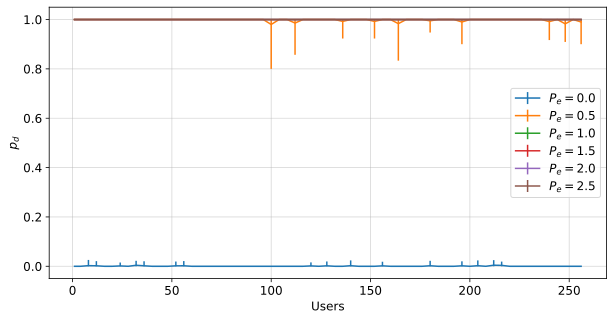



HASSAN_16251041164724545:
Figura salva em: /home/dimi/Pilot-Contamination-Detection-Massive-MIMO/results/test_2/test_2_Hassan_16251041164724545_E_eta_10_dB_256_antennas_300_symbols.pdf
acuraciaMedia:            0.9594153846153844
acuraciaDesvio:           0.002573235018714491
precisaoMedia:            1.0
precisaoDesvio:           0.0
revocacaoMedia:           0.9188472529992412
revocacaoDesvio:          0.0048000122816118495
tempoProcessamentoMedio:  1.2871060004601112e-05
tempoProcessamentoDesvio: 5.241074133435078e-07
somaMatrizesConfusao:     [[32500, 0], [2638, 29862]]


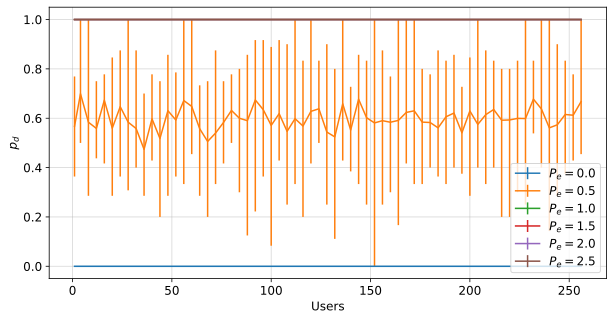

In [6]:
printarTestes = (
    ("tree",   ["qtdUsuarios", "E"]),
    ("hassan", ["E", "eta"]),
)

for tecnicaDeteccao, featuresSelecionadas in printarTestes:
    for key, values in dictResultados.items():
        if tecnicaDeteccao.upper() in key.upper() and featuresSelecionadas == values["featuresSelecionadas"]:
            print(key.upper() + ":")
            printarProbabilidadeDeteccao(key, values, dirResultados)
            print("\n")